In [49]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('tradelog.csv', index_col = 0)

In [50]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

(array([53.,  0.,  0., 29., 17.,  0.,  0.,  0.,  0.,  0., 33., 14.,  0.,
         0., 53.,  0.,  0., 42.,  0.,  0.,  0., 23.,  0., 22.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,
         7.   ,  7.875,  8.75 ,  9.625, 10.5  , 11.375, 12.25 , 13.125,
        14.   , 14.875, 15.75 , 16.625, 17.5  , 18.375, 19.25 , 20.125,
        21.   ]),
 <BarContainer object of 24 artists>)

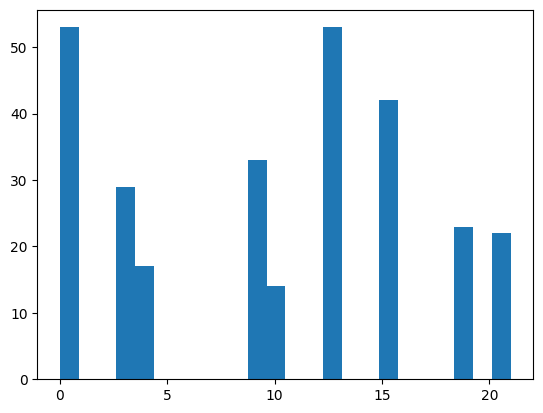

In [51]:
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

In [52]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades'])



In [60]:
for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()
    dg

    if no_trades == 0:
        hourly_summary.loc[h,'win_rate'] = 0
    else:
        hourly_summary.loc[h,'win_rate'] = wins/no_trades
    
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades


In [61]:
hourly_summary


,win_rate,PnL,no_trades
0,0.54717,41.066879,53
1,0,0.0,0
2,0,0.0,0
3,0.62069,32.640442,29
4,0.529412,-2.411223,17
5,0,0.0,0
6,0,0.0,0
7,0,0.0,0
8,0,0.0,0
9,0.484848,2.156033,33


([<matplotlib.axis.XTick at 0x11a575d30>,
 [Text(0.0, 0, '2022-05-29 21:00:00+00:00'),
  Text(10.0, 0, '2022-06-15 18:35:00+00:00'),
  Text(20.0, 0, '2022-07-01 03:45:00+00:00'),
  Text(30.0, 0, '2022-07-28 01:00:00+00:00'),
  Text(40.0, 0, '2022-08-10 12:30:00+00:00'),
  Text(50.0, 0, '2022-09-01 14:20:00+00:00'),
  Text(60.0, 0, '2022-09-22 13:55:00+00:00'),
  Text(70.0, 0, '2022-10-21 15:15:00+00:00'),
  Text(80.0, 0, '2022-11-02 18:30:00+00:00'),
  Text(90.0, 0, '2022-11-14 09:00:00+00:00'),
  Text(100.0, 0, '2022-11-30 10:40:00+00:00'),
  Text(110.0, 0, '2022-12-15 17:10:00+00:00'),
  Text(120.0, 0, '2022-12-30 08:10:00+00:00'),
  Text(130.0, 0, '2023-01-18 14:05:00+00:00'),
  Text(140.0, 0, '2023-02-11 07:30:00+00:00'),
  Text(150.0, 0, '2023-03-09 13:30:00+00:00'),
  Text(160.0, 0, '2023-03-16 15:35:00+00:00'),
  Text(170.0, 0, '2023-04-07 12:30:00+00:00'),
  Text(180.0, 0, '2023-05-11 00:15:00+00:00'),
  Text(190.0, 0, '2023-06-15 01:55:00+00:00'),
  Text(200.0, 0, '2023-07-13 

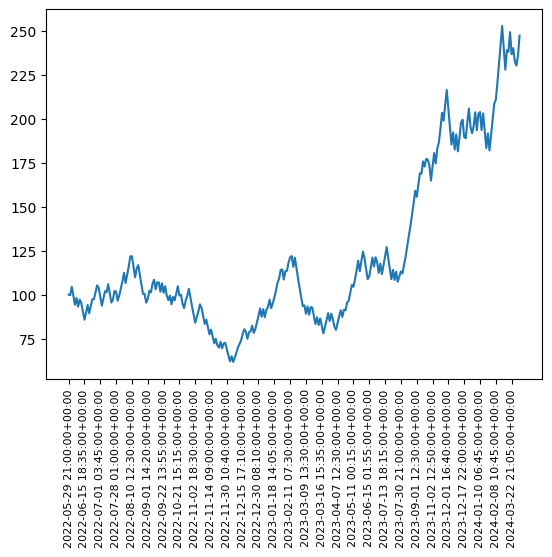

In [67]:
plt.plot(df['close_time'],df['account_balance(t)'])
timestamps_display = df['close_time'][::10]
plt.xticks(ticks = timestamps_display, rotation = 90, fontsize = 8)
# plt.xticks(rotation=90)
